# Laboratorio 3 - Regresiones lineales vía GD, SGD y *Minibatch*

Universidad Galileo

Algoritmos en la Ciencia de Datos

**Rodrigo Rafael Chang Papa**

**Carné: 19000625**

## Carga de librerías

In [90]:
import matplotlib.pyplot as plt
import numpy as np
import time

## Generación de datos

In [5]:
d = 100 #cantidad de columnas para el dataset.
n = 1000 #cantidad de observaciones para el dataset.
np.random.seed(1619)
X = np.random.normal(0,1, size=(n,d))
beta_true = np.random.normal(0,1, size=(d,1))
y = X.dot(beta_true) + np.random.normal(0,0.5,size=(n,1))

In [7]:
# Revisamos los parámetros reales
print("Parámetros reales generados (primeros 10):")
print(beta_true[:10])

Parámetros reales generados:
[[ 1.84539847]
 [-0.87907338]
 [ 1.34807896]
 [-0.29829864]
 [ 1.33306707]
 [-1.13986581]
 [ 0.12886293]
 [ 0.79408485]
 [-0.92875069]
 [ 1.96186099]]


## Definición de la función de costo

In [8]:
def costo_fn(X,y, beta):
    return np.mean(np.power(np.matmul(X,beta) - y, 2)) / 2

***
## **Parte 1: Solución cerrada** 

A continuación, aplicaremos operaciones matriciales para obtener la solución cerrada al problema de mínimos cuadrados ordinarios. En este caso $$ \beta^{*} = \left(X^T X\right)^{-1} X^{T}Y$$

In [11]:
# Solución cerrada
beta_closed = np.matmul(np.linalg.inv(np.matmul(X.T,X)),np.matmul(X.T,y))
print("Solución cerrada (primeros diez):")
print(beta_closed[:10])

Solución cerrada (primeros diez):
[[ 1.79935142]
 [-0.89458176]
 [ 1.3142147 ]
 [-0.31377729]
 [ 1.31127977]
 [-1.15463746]
 [ 0.13783279]
 [ 0.79171507]
 [-0.92181892]
 [ 1.98847133]]


***
## Parte 2: Gradiente en descenso (GD)
En esta parte aplicaremos la técnica de *gradient descent* para obtener los parámetros estimados, minimizando iteración con iteración la función de costo. En este caso, el gradiente se computa utilizando *toda* la muestra o el *batch* completo.

In [15]:
np.zeros((2,2))

array([[0., 0.],
       [0., 0.]])

In [91]:
# Función de gradiente en descenso
def gradientDescent(X, y, learning_rate, epochs):
    m = len(y)
    costo_tray = []
    print("GD: Ejecutando algoritmo de Gradient Descent con lr=%0.6f, epochs=%d" % (learning_rate, epochs))
    beta = np.zeros((d, 1))

    start = time.time()
    for i in range(epochs):
        y_hat = np.matmul(X, beta)
        beta += (-1/m) * learning_rate * (np.matmul(X.T,(y_hat - y)))
        costo_tray.append(costo_fn(X, y, beta))
    stop = time.time()
    print("Tiempo de ejecución: ", (stop-start))
    return beta, np.array(costo_tray)

In [92]:
# Obtenemos parámetros con Gradient Descent por 100 epochs
beta_gd1, costo_gd1 = gradientDescent(X, y, learning_rate=0.0005, epochs=100)
beta_gd2, costo_gd2 = gradientDescent(X, y, learning_rate=0.005, epochs=100)
beta_gd3, costo_gd3 = gradientDescent(X, y, learning_rate=0.05, epochs=100)

GD: Ejecutando algoritmo de Gradient Descent con lr=0.000500, epochs=100
Tiempo de ejecución:  0.0945131778717041
GD: Ejecutando algoritmo de Gradient Descent con lr=0.005000, epochs=100
Tiempo de ejecución:  0.03475689888000488
GD: Ejecutando algoritmo de Gradient Descent con lr=0.050000, epochs=100
Tiempo de ejecución:  0.02380228042602539


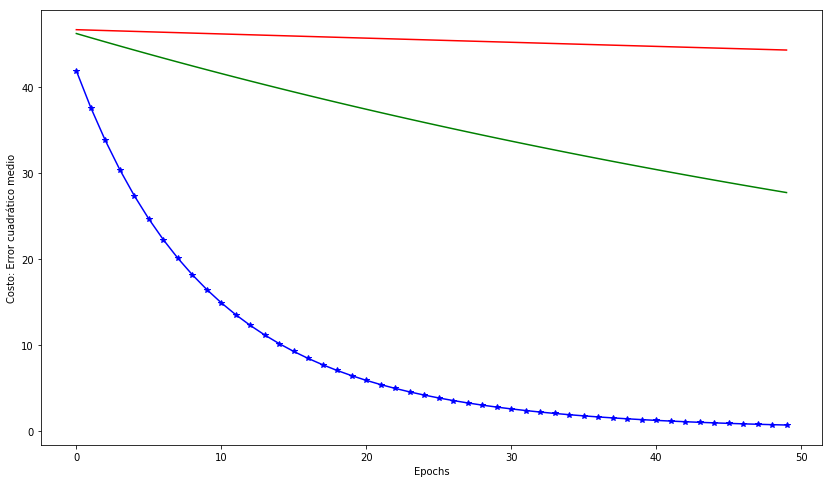

In [93]:
t = 50
plt.figure(figsize=(14, 8))
plt.plot(costo_gd1[:t], 'r-')
plt.plot(costo_gd2[:t], 'g-')
plt.plot(costo_gd3[:t], 'b*-')

plt.xlabel('Epochs')
plt.ylabel('Costo: Error cuadrático medio')
plt.show()

In [50]:
beta_gd3, costo_gd3 = gradientDescent(X, y, learning_rate=0.05, epochs=100)
print("Gradient descent (primeros diez):")
print(beta_gd3[:10])

GD: Ejecutando algoritmo de Gradient Descent con lr=0.050000
Gradient descent (primeros diez):
[[ 1.76701806]
 [-0.88733302]
 [ 1.28979787]
 [-0.31314826]
 [ 1.27564768]
 [-1.13346524]
 [ 0.12072632]
 [ 0.75848371]
 [-0.93146791]
 [ 1.94922251]]


***
## Parte 3: Gradiente en descenso estocástico (SGD)
En esta parte aplicaremos la técnica de *stochastic gradient descent* para obtener los parámetros estimados, minimizando iteración con iteración la función de costo. En este caso, el gradiente se computa utilizando *un* ejemplo o muestra a la vez.

In [94]:
def StochasticGradientDescent(X, y, learning_rate, epochs):
    m = len(y)
    costo_tray = []
    beta = np.zeros((d, 1))
    print("SGD: Ejecutando algoritmo de Stochastic Gradient Descent con lr=%0.6f" % (learning_rate))
    
    start = time.time()
    # Para cada epoch
    for j in range(epochs):
        # Este loop se ejecuta el número de ejemplo que tengamos
        for i in range(m):
            # Se escoge un ejemplo aleatorio
            random = np.random.randint(0,m)
            X_i = X[random,:].reshape(1, -1)
            y_i = y[random].reshape(1, -1)
            # Computar el valor ajustado y actualizar los parámetros
            y_hat = np.matmul(X_i,beta)
            beta -= (1/m)*learning_rate*(np.matmul(X_i.T,(y_hat - y_i)))
            costo_tray.append(costo_fn(X, y, beta))
    stop = time.time()
    print("Tiempo de ejecución: ", (stop-start))
    return beta, np.array(costo_tray)

In [95]:
# Ejecutar con parámetros diferentes
beta_sgd1, costo_sgd1 = StochasticGradientDescent(X,y, learning_rate=0.0005, epochs=2)
beta_sgd2, costo_sgd2 = StochasticGradientDescent(X,y, learning_rate=0.005, epochs=2)
beta_sgd3, costo_sgd3 = StochasticGradientDescent(X,y, learning_rate=0.01, epochs=2)

SGD: Ejecutando algoritmo de Stochastic Gradient Descent con lr=0.000500
Tiempo de ejecución:  0.45501017570495605
SGD: Ejecutando algoritmo de Stochastic Gradient Descent con lr=0.005000
Tiempo de ejecución:  0.4124617576599121
SGD: Ejecutando algoritmo de Stochastic Gradient Descent con lr=0.010000
Tiempo de ejecución:  0.6798934936523438


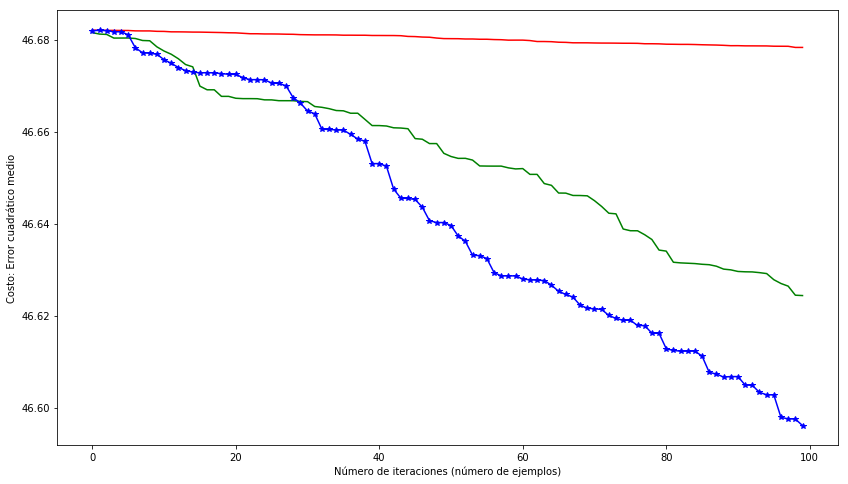

In [96]:
t = 100
plt.figure(figsize=(14, 8))
plt.plot(costo_sgd1[:t], 'r-')
plt.plot(costo_sgd2[:t], 'g-')
plt.plot(costo_sgd3[:t], 'b*-')

plt.xlabel('Número de iteraciones (número de ejemplos)')
plt.ylabel('Costo: Error cuadrático medio')
plt.show()

In [97]:
print("Stochastic Gradient Descent (primeros diez):")
print(beta_sgd3[:10])

Stochastic Gradient Descent (primeros diez):
[[ 0.03100521]
 [-0.03018545]
 [ 0.02277101]
 [-0.00073154]
 [ 0.01588848]
 [-0.01281569]
 [-0.0014884 ]
 [ 0.01270546]
 [-0.02316077]
 [ 0.04827342]]


***
## Parte 4: Gradiente en descenso con *minibatch* (MBGD)
En esta parte aplicaremos la técnica de *minibatch gradient descent* para obtener los parámetros estimados, minimizando iteración con iteración la función de costo. En este caso, el gradiente se computa utilizando *un subconjunto (minibatch)* de ejemplos a la vez.

In [98]:
def MiniBatchGD(X, y, learning_rate, epochs, batch_size):
    m = len(y)
    # Obtenemos el número de batches por epoch
    num_batches = int(m / batch_size)
    costo_tray = []
    # Inicializar el vector de betas
    beta = np.zeros((d, 1))
    print("MBGD: Ejecutando algoritmo de Minibatch Gradient Descent con lr=%0.6f, batch_size=%d" % (learning_rate, batch_size))
    
    start = time.time()
    # Para cada epoch
    for a in range(epochs):
        # Obtener una permutación del batch completo
        sorted_idx = np.random.permutation(m)
        X = X[sorted_idx]
        y = y[sorted_idx]
        
        # Ejecutar el gradiente en descenso con cada minibatch
        for i in range(0, m, batch_size):
            # Obtener el batch
            X_i = X[i : i + batch_size]
            y_i = y[i : i + batch_size]
            # Obtener valor ajustado y actualizar parámetros
            y_hat = np.matmul(X_i,beta)
            beta = beta - (1/m)*learning_rate*(np.matmul(X_i.T,(y_hat - y_i)))
            # Obtener el costo
            costo_tray.append(costo_fn(X, y, beta))
    stop = time.time()
    print("Tiempo de ejecución: ", (stop-start))
    return beta, np.array(costo_tray)

In [131]:
beta_mbgd1, costo_mbgd1 = MiniBatchGD(X, y, learning_rate=0.0005, epochs=100, batch_size=25)
beta_mbgd2, costo_mbgd2 = MiniBatchGD(X,y, learning_rate=0.005, epochs=100, batch_size=25)
beta_mbgd3, costo_mbgd3 = MiniBatchGD(X,y, learning_rate=0.01, epochs=100, batch_size=100)

MBGD: Ejecutando algoritmo de Minibatch Gradient Descent con lr=0.000500, batch_size=25
Tiempo de ejecución:  0.8140425682067871
MBGD: Ejecutando algoritmo de Minibatch Gradient Descent con lr=0.005000, batch_size=25
Tiempo de ejecución:  0.8365840911865234
MBGD: Ejecutando algoritmo de Minibatch Gradient Descent con lr=0.010000, batch_size=100
Tiempo de ejecución:  0.2835080623626709


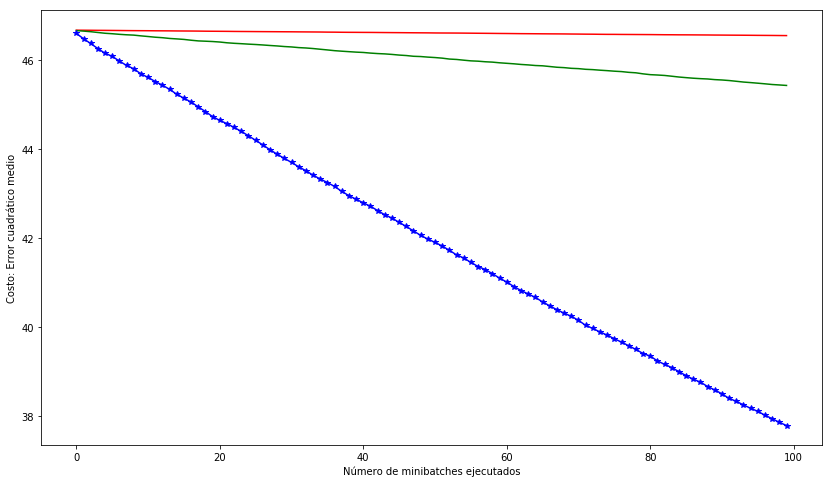

In [133]:
t = 100
plt.figure(figsize=(14, 8))
plt.plot(costo_mbgd1[:t], 'r-')
plt.plot(costo_mbgd2[:t], 'g-')
plt.plot(costo_mbgd3[:t], 'b*-')

plt.xlabel('Número de minibatches ejecutados')
plt.ylabel('Costo: Error cuadrático medio')
plt.show()

In [101]:
print("Minibatch Gradient Descent (primeros diez):")
print(beta_mbgd3[:10])

Minibatch Gradient Descent (primeros diez):
[[ 1.11607837]
 [-0.67717861]
 [ 0.78299548]
 [-0.15461903]
 [ 0.67266431]
 [-0.65887518]
 [ 0.0103713 ]
 [ 0.38318288]
 [-0.64617285]
 [ 1.23102245]]


***
## Parte 5: comparación
En esta parte intentaremos obtener los mejores parámetros para cada uno de los 3 tipos de algoritmos de gradiente en descenso.

In [134]:
print("## Obtención de los mejores parámetros y comparación")
print("# Solución cerrada")
start = time.time()
beta_closed = np.matmul(np.linalg.inv(np.matmul(X.T,X)),np.matmul(X.T,y))
stop = time.time()
print("Tiempo de ejecución: ", (stop-start))
print("Costo: ", costo_fn(X, y, beta_closed))
print("Norma euclidiana entre beta_true y beta_closed: %0.4f" % (np.linalg.norm(beta_true - beta_closed)))

## Obtención de los mejores parámetros y comparación
# Solución cerrada
Tiempo de ejecución:  0.07294106483459473
Costo:  0.1206508760462731
Norma euclidiana entre beta_true y beta_closed: 0.1753


In [127]:
print("# GD")
beta_gd, costo_gd = gradientDescent(X, y, learning_rate=0.05, epochs=100)
print("Costo: ", costo_fn(X, y, beta_gd))
print("Norma euclidiana entre beta_true y beta_gd: %0.4f" % (np.linalg.norm(beta_true - beta_gd)))

# GD
GD: Ejecutando algoritmo de Gradient Descent con lr=0.050000, epochs=100
Tiempo de ejecución:  0.05608201026916504
Costo:  0.14194195992305908
Norma euclidiana entre beta_true y beta_gd: 0.3123


In [128]:
print("# SGD")
beta_sgd, costo_sgd = StochasticGradientDescent(X,y, learning_rate=0.01, epochs=100)
print("Costo: ", costo_fn(X, y, beta_sgd))
print("Norma euclidiana entre beta_true y beta_sgd: %0.4f" % (np.linalg.norm(beta_true - beta_sgd)))

# SGD
SGD: Ejecutando algoritmo de Stochastic Gradient Descent con lr=0.010000
Tiempo de ejecución:  21.626715421676636
Costo:  6.74515837473899
Norma euclidiana entre beta_true y beta_sgd: 4.0513


In [129]:
print("# MBGD")
beta_mbgd, costo_mbgd = MiniBatchGD(X,y, learning_rate=0.01, epochs=500, batch_size=500)
print("Costo: ", costo_fn(X, y, beta_mbgd))
print("Norma euclidiana entre beta_true y beta_mbgd: %0.4f" % (np.linalg.norm(beta_true - beta_mbgd)))

# MBGD
MBGD: Ejecutando algoritmo de Minibatch Gradient Descent con lr=0.010000, batch_size=500
Tiempo de ejecución:  0.5495855808258057
Costo:  0.14386058996471077
Norma euclidiana entre beta_true y beta_mbgd: 0.3220
